In [1]:
import numpy as np

In [2]:
def sig(x): return 1/(1+(np.e**(-x)))

In [3]:
class NeuralNetwork():
    def __init__(self, layers):
        self.layers = layers
        self.weigths = []
        self.bias = []
    
    def generate_random_weights(self):
        for i in range(1, len(self.layers)):
            curr = np.random.rand(self.layers[i-1], self.layers[i]) * 2 - 1
            b = np.random.rand(1, self.layers[i]) * 2 - 1
            self.weigths.append(curr)
            self.bias.append(b)

    def set_weights(self, weights):
        self.weigths = weights

    def forward(self, input):
        if len(input) != self.layers[0]:
            return None
        input = [input]
        for i, w in enumerate(self.weigths):
            input = input @ w + self.bias[i]
            for i in range(len(input[0])):
                input[0][i] = sig(input[0][i])
        return input[0]

    def train(self, X, Y, lr=0.005):
        loss_f = (lambda Yp, Yr: np.mean((Yr - Yp) ** 2),
                  lambda Yp, Yr: (Yr - Yp))

        for i in range(len(X)):
            out = nn.forward(X[i])
            loss = loss_f[0](out, Y[i])


In [4]:
nn = NeuralNetwork([2, 4, 8, 1])
nn.generate_random_weights()
nn.forward([.2, .4])

array([[0.63848264]])

# TEST

In [41]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

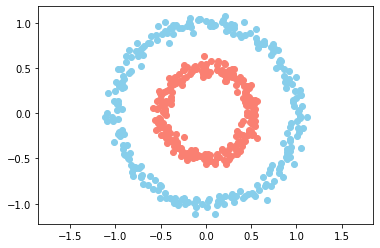

In [38]:
# Generating Dataset

n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

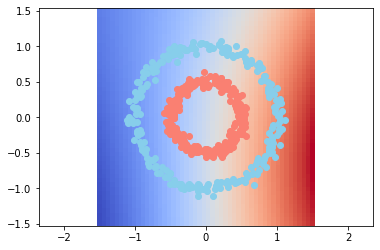

In [ ]:
nn = NeuralNetwork([2, 4, 8, 1])
nn.generate_random_weights()

for i in range(1):
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)
    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
        for i1, x1 in enumerate(_x1):
            _Y[i0, i1] = nn.forward([x0, x1])[0]

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    time.sleep(0.5)


